Extract the audio from the mp3 file

In [73]:
!pip install pydub      # splitting audio files and stuff

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pyAudioAnalysis


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install -U praat-parselmouth

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 67.1 MB/s eta 0:00:00


part 1

In [81]:
from pydub import AudioSegment 
from matplotlib import pyplot as plt
import librosa
import numpy as np
import parselmouth
import statsmodels.api as sm
from scipy.signal import find_peaks
from pydub import AudioSegment
from sklearn import svm
import pandas as pd
# Load the MP3 file
audio = AudioSegment.from_mp3("/content/Dil Ke Paas - Arijit Singh_128-(DJMaza).mp3")
# Extract the audio data
audio_data = np.array(audio.get_array_of_samples())
#Convert the audio data to a list of floats
audio_data = [float(sample)/32768 for sample in audio_data]
# Print the first 10 samples
print(audio_data[:10])


[3.0517578125e-05, -9.1552734375e-05, -6.103515625e-05, 0.0, -3.0517578125e-05, -3.0517578125e-05, 0.0, -3.0517578125e-05, -3.0517578125e-05, 0.0]


Speakers Emotions

In [82]:
### pitch calculation 
# Load data and sampling frequency from the data file
data, sampling_frequency = librosa.load('/content/Dil Ke Paas - Arijit Singh_128-(DJMaza).mp3')

# Get some useful statistics
T = 1/sampling_frequency # Sampling period
N = len(data) # Signal length in samples
t = N / sampling_frequency # Signal length in seconds


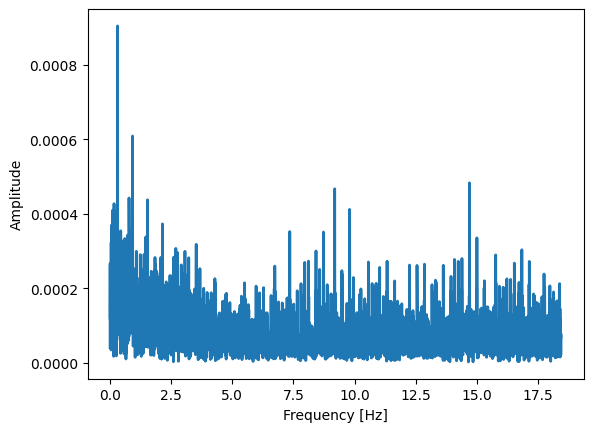

In [83]:
Y_k = np.fft.fft(data)[0:int(N/2)]/N # FFT
Y_k[1:] = 2*Y_k[1:] # Single-sided spectrum
Pxx = np.abs(Y_k) # Power spectrum

f = sampling_frequency * np.arange((N/2)) / N; # frequencies

# plotting
fig,ax = plt.subplots()
plt.plot(f[0:5000], Pxx[0:5000], linewidth=2)
plt.ylabel('Amplitude')
plt.xlabel('Frequency [Hz]')
plt.show()

In [84]:
auto = sm.tsa.acf(data, nlags=2000)
peaks = find_peaks(auto)[0] # Find peaks of the autocorrelation
lag = peaks[0] # Choose the first peak as our pitch component lag
pitch = sampling_frequency / lag # Transform lag into frequency

for energy

In [85]:


# Load the mp3 file and convert to a numpy array
#audio_file = AudioSegment.from_file("/content/Dil Ke Paas - Arijit Singh_128-(DJMaza).mp3")
#audio_data =  np. asfarray(audio_file.get_array_of_samples())
audio_data =  np. asfarray(audio_data)

# Resample the audio signal to 16kHz and convert to mono
audio_data_resampled = librosa.resample(audio_data,orig_sr=len(audio_data),target_sr=16000)
audio_data_mono = librosa.to_mono(audio_data_resampled)


# Extract acoustic features from the audio signal
pitch = parselmouth.Sound(audio_data_mono).to_pitch()
pitch_values = pitch.selected_array['frequency']
energy_values =np.square(audio_data_mono)
print(pitch_values)
print(energy_values)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.01488436e-11 2.86697710e-10 1.89230114e-10 ... 3.33517275e-10
 3.08070211e-12 7.40139167e-11]


Train a model

In [86]:
# Train a machine learning model to predict emotions
features = np.concatenate((pitch_values, energy_values), axis=0)
labels = np.array(['happy', 'angry', 'sad', 'neutral'])  # Labeled emotional data\
print(features)


[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.33517275e-10
 3.08070211e-12 7.40139167e-11]


predict the emotions 

In [87]:
clf = svm.SVC()
clf.fit(features, labels)

# Predict the speaker's emotion in the mp3 file
audio_features = np.concatenate((pitch_values, energy_values), axis=0)
predicted_emotion = clf.predict([audio_features])
print(f"Predicted emotion: {predicted_emotion}")

ValueError: ignored